In [15]:
import os
import sys
import csv
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Define the file paths
# GENERALIZED BORN and POISSON BOLTZMANN ENERGY FILE
mmpbsa_fh = "/home/shrikant/Projects/dev_project/gromacs/data/FINAL_RESULTS_MMPBSA.csv"
# READ THE FILE AND CREATE A DATAFRAME
mmpbsa_df = pd.read_csv(mmpbsa_fh, sep= ',' ,header=None)

In [3]:
# Step 1: Read the entire CSV file as a DataFrame without assuming headers
df = pd.read_csv(mmpbsa_fh, header=None)

# Step 2: Find the indices where each section starts
gb_complex_energy_index = df[df[0] == 'Complex Energy Terms'].index[0]
gb_receptor_energy_index = df[df[0] == 'Receptor Energy Terms'].index[0]
gb_ligand_energy_index = df[df[0] == 'Ligand Energy Terms'].index[0]
gb_delta_energy_index = df[df[0] == 'Delta Energy Terms'].index[0]

# Step 3: Find the index where "POISSON BOLTZMANN" starts (to stop reading after that)
poisson_boltzmann_index = df[df[0] == 'POISSON BOLTZMANN:'].index[0]

# Step 4: Extract data of GENERALIZED BORN for "Complex Energy Terms"
gb_df_complex_energy = df.iloc[gb_complex_energy_index + 2: gb_receptor_energy_index - 1]
gb_df_complex_energy.columns = df.iloc[gb_complex_energy_index + 1]  # Set headers as row after "Complex Energy Terms"

# Step 5: Extract of GENERALIZED BORN data for "Receptor Energy Terms"
gb_df_receptor_energy = df.iloc[gb_receptor_energy_index + 2: gb_ligand_energy_index-1]
gb_df_receptor_energy.columns = df.iloc[gb_receptor_energy_index + 1]  # Set headers as row after "Receptor Energy Terms"

# Step 6: Extract of GENERALIZED BORN data for "Ligand Energy Terms"
gb_df_ligand_energy = df.iloc[gb_ligand_energy_index + 2: gb_delta_energy_index-1]
gb_df_ligand_energy.columns = df.iloc[gb_ligand_energy_index + 1]  # Set headers as row after "Ligand Energy Terms"

# Step 7: Extract of GENERALIZED BORN data for "Delta Energy Terms"
gb_df_delta_energy = df.iloc[gb_delta_energy_index + 2: poisson_boltzmann_index-2]
gb_df_delta_energy.columns = df.iloc[gb_delta_energy_index + 1]  # Set headers as row after "Delta Energy Terms"

# Print the extracted dataframes for each section
print(f"GENERALIZED BORN: COMPLEX ENERGY INDEX:{gb_complex_energy_index}\nGENERALIZED BORN: RECEPTOR ENERGY INDEX:{gb_receptor_energy_index}\n\
GENERALIZED BORN: LIGAND ENERGY INDEX:{gb_ligand_energy_index}\nGENERALIZED BORN: DELTA ENERGY INDEX:{gb_delta_energy_index}")

GENERALIZED BORN: COMPLEX ENERGY INDEX:1
GENERALIZED BORN: RECEPTOR ENERGY INDEX:1805
GENERALIZED BORN: LIGAND ENERGY INDEX:3609
GENERALIZED BORN: DELTA ENERGY INDEX:5413


In [13]:
print(f"GENERALIZED BORN COMPLEX ENERGY INDEX: {gb_complex_energy_index} GENERALIZED BORN: RECEPTOR ENERGY INDEX:{gb_receptor_energy_index-2}")

GENERALIZED BORN COMPLEX ENERGY INDEX: 1 GENERALIZED BORN: RECEPTOR ENERGY INDEX:1803


In [12]:
print(f"GENERALIZED BORN RECEPTOR ENERGY INDEX: {gb_receptor_energy_index+2} GENERALIZED BORN: LIGAND ENERGY INDEX:{gb_ligand_energy_index-2}")

GENERALIZED BORN RECEPTOR ENERGY INDEX: 1807 GENERALIZED BORN: LIGAND ENERGY INDEX:3607


In [11]:
print(f"GENERALIZED BORN LIGAND ENERGY INDEX: {gb_ligand_energy_index+2} GENERALIZED BORN: DELTA ENERGY INDEX:{gb_delta_energy_index-2}")

GENERALIZED BORN LIGAND ENERGY INDEX: 3611 GENERALIZED BORN: DELTA ENERGY INDEX:5411


In [10]:
print(f"GENERALIZED BORN DELTA ENERGY INDEX: {gb_delta_energy_index+2} POISSON BOLTZMANN INDEX:{poisson_boltzmann_index-2}")

GENERALIZED BORN DELTA ENERGY INDEX: 5415 POISSON BOLTZMANN INDEX:7216


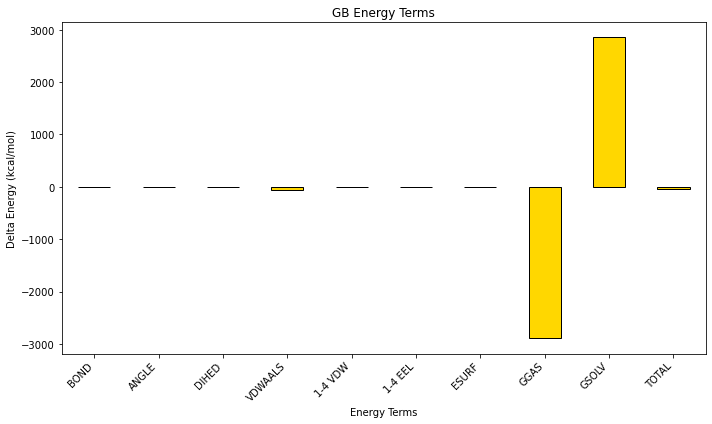

In [8]:
# Average columns from the dataframe
gb_columns = ['BOND', 'ANGLE', 'DIHED', 'VDWAALS', '1-4 VDW', '1-4 EEL', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL']

df = pd.DataFrame(gb_df_delta_energy, columns=gb_columns)
# get mean of each columns in df
df['BOND'] = pd.to_numeric(df['BOND'], downcast="float")
df['ANGLE'] = pd.to_numeric(df['ANGLE'], downcast="float")
df['DIHED'] = pd.to_numeric(df['DIHED'], downcast="float")
df['VDWAALS'] = pd.to_numeric(df['VDWAALS'], downcast="float")
df['1-4 VDW'] = pd.to_numeric(df['1-4 VDW'], downcast="float")
df['1-4 EEL'] = pd.to_numeric(df['1-4 EEL'], downcast="float")
df['ESURF'] = pd.to_numeric(df['ESURF'], downcast="float")
df['GGAS'] = pd.to_numeric(df['GGAS'], downcast="float")
df['GSOLV'] = pd.to_numeric(df['GSOLV'], downcast="float")
df['TOTAL'] = pd.to_numeric(df['TOTAL'], downcast="float")
gb_columns_avg = df[gb_columns].mean()

# Plotting the bar plot
plt.figure(figsize=(10,6))
gb_columns_avg.plot(kind='bar', color='gold', edgecolor='black')
plt.title('GB Energy Terms')
plt.xlabel('Energy Terms')
plt.ylabel('Delta Energy (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:

# Step 3: Slice the DataFrame to keep only the rows before this index
df_poisson = df.iloc[poisson_boltzmann_index:]
pb_complex_energy_index = df_poisson[df_poisson[0] == 'Complex Energy Terms'].index[0]
pb_receptor_energy_index = df_poisson[df_poisson[0] == 'Receptor Energy Terms'].index[0]
pb_ligand_energy_index = df_poisson[df_poisson[0] == 'Ligand Energy Terms'].index[0]
pb_delta_energy_index = df_poisson[df_poisson[0] == 'Delta Energy Terms'].index[0]

# Step 4: Extract data of POISSON BOLTZMANN for "Complex Energy Terms"
pb_df_complex_energy = df.iloc[pb_complex_energy_index + 2 : pb_receptor_energy_index - 1]
pb_df_complex_energy.columns = df.iloc[pb_complex_energy_index + 1]  # Set headers as row after "Complex Energy Terms"

# Step 5: Extract data of POISSON BOLTZMANN for "Receptor Energy Terms"
pb_df_receptor_energy = df.iloc[pb_receptor_energy_index + 2 : pb_ligand_energy_index - 1]
pb_df_receptor_energy.columns = df.iloc[pb_receptor_energy_index + 1]  # Set headers as row after "Receptor Energy Terms"

# Step 6: Extract data of POISSON BOLTZMANN for "Ligand Energy Terms"
pb_df_ligand_energy = df.iloc[pb_ligand_energy_index + 2 : pb_delta_energy_index - 1]
pb_df_ligand_energy.columns = df.iloc[pb_ligand_energy_index + 1]  # Set headers as row after "Ligand Energy Terms"

# Step 7: Extract data of POISSON BOLTZMANN for "Delta Energy Terms"
pb_df_delta_energy = df.iloc[pb_delta_energy_index + 2:]
pb_df_delta_energy.columns = df.iloc[pb_delta_energy_index + 1]  # Set headers as row after "Delta Energy Terms"

print(f" POSISSON BOLTZMANN INDEX:{poisson_boltzmann_index}\n POSISSON BOLTZMANN COMPLEX ENERGY INDEX:{pb_complex_energy_index}\n \
POSISSON BOLTZMANN RECEPTOR ENERGY INDEX:{pb_receptor_energy_index}\n POSISSON BOLTZMANN LIGAND ENERGY INDEX:{pb_ligand_energy_index}\n \
POSISSON BOLTZMANN DELTA ENERGY INDEX:{pb_delta_energy_index}")

 POSISSON BOLTZMANN INDEX:7218
 POSISSON BOLTZMANN COMPLEX ENERGY INDEX:7219
 POSISSON BOLTZMANN RECEPTOR ENERGY INDEX:9023
 POSISSON BOLTZMANN LIGAND ENERGY INDEX:10827
 POSISSON BOLTZMANN DELTA ENERGY INDEX:12631


In [21]:
# Step 5: Find the index of the row that starts with 'Receptor Energy Terms'
print(f"POISSION BOLTAZMANN INDEX: {poisson_boltzmann_index}\nCOMPLEX ENERGY INDEX: {pb_complex_energy_index+2}  LIGAND ENERGY INDEX: {pb_receptor_energy_index-2}")

POISSION BOLTAZMANN INDEX: 7218
COMPLEX ENERGY INDEX: 7221  LIGAND ENERGY INDEX: 9021


In [22]:
print(f"RECEPTOR ENERGY INDEX: {pb_receptor_energy_index+2} RECEPTOR ENERGY INDEX: {pb_ligand_energy_index-2}")

RECEPTOR ENERGY INDEX: 9025 RECEPTOR ENERGY INDEX: 10825


In [23]:
print(f"LIGAND ENERGY INDEX: {pb_ligand_energy_index+2} DELTA ENERGY INDEX: {pb_delta_energy_index-2}")

LIGAND ENERGY INDEX: 10829 DELTA ENERGY INDEX: 12629


In [24]:
# Step 7: Extract data for "Delta Energy Terms"
print (f"DELTA ENERGY INDEX: {pb_delta_energy_index+2} DELTA ENERGY END INDEX: {pb_df_delta_energy.index[-1]}")

DELTA ENERGY INDEX: 12633 DELTA ENERGY END INDEX: 14433


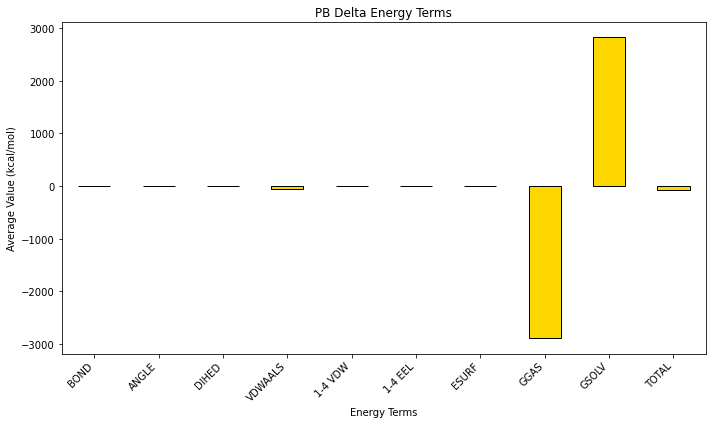

In [25]:
# Average columns from the dataframe
pb_columns = ['BOND', 'ANGLE', 'DIHED', 'VDWAALS', '1-4 VDW', '1-4 EEL', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL']

df = pd.DataFrame(pb_df_delta_energy, columns=gb_columns)
# get mean of each columns in df
df['BOND'] = pd.to_numeric(df['BOND'], downcast="float")
df['ANGLE'] = pd.to_numeric(df['ANGLE'], downcast="float")
df['DIHED'] = pd.to_numeric(df['DIHED'], downcast="float")
df['VDWAALS'] = pd.to_numeric(df['VDWAALS'], downcast="float")
df['1-4 VDW'] = pd.to_numeric(df['1-4 VDW'], downcast="float")
df['1-4 EEL'] = pd.to_numeric(df['1-4 EEL'], downcast="float")
df['ESURF'] = pd.to_numeric(df['ESURF'], downcast="float")
df['GGAS'] = pd.to_numeric(df['GGAS'], downcast="float")
df['GSOLV'] = pd.to_numeric(df['GSOLV'], downcast="float")
df['TOTAL'] = pd.to_numeric(df['TOTAL'], downcast="float")
pb_columns_avg = df[pb_columns].mean()

# Plotting the bar plot
plt.figure(figsize=(10,6))
pb_columns_avg.plot(kind='bar', color='gold', edgecolor='black')
plt.title('PB Delta Energy Terms')
plt.xlabel('Energy Terms')
plt.ylabel('Average Value (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()